🎯 스터디 내용 🎯  
1. 결정트리
2. 교차 검증과 그리드 서치
3. 트리의 앙상블

🔍 사용할 알고리즘
1. 결정트리
2. 랜덤 포레스트
3. 엑스트라 트리
4. 그레이디언트 부스팅 ( 과제에는 없습니다! )
5. 히스토그램 기반 그레이디언트 부팅

---


> 강의 자료 참고하여 코드 작성 및 빈칸 채우시면 됩니다!

In [ ]:
# wine 데이터를 가져오기
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

# wine데이터를 확인
wine.head()

#와인의 데이터 프레임 확인
wine.info()

# 총 6497개의 샘플이 존재하고, 총 4개의 열을 갖는다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [6]:
# 데이터 프레임을 넘파이 배열로 바꾸어서, 훈련 세트와 테스트 세트로 나누기
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
   data, target, test_size=0.2, random_state=42)

NameError: name 'train_scaled' is not defined

In [7]:
# 트리 학습 시켜보기 (깊이를 제한해서 그리기 : 최대 깊이 = 3 )
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077
0.996921300750433
0.8592307692307692


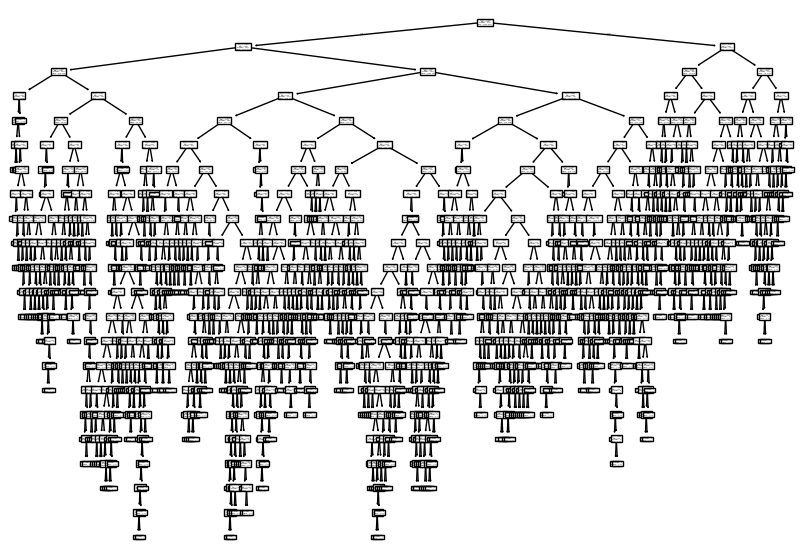

In [8]:
# 트리 모델 객체 그림으로 표현하기
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

# 첫번째 노드 해석해보기 >> EX. 어떤 특성이  ~일 때, 무엇이다.



---



In [ ]:
# 결정 트리 모델로 교차 검증 해보기
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

In [ ]:
# 그리드 서치 : 하이퍼 파리미터 탐색과 교차 검증을 한번에 수행

from sklearn.model_selection import GridSearchCV

# 탐색할 매개변수와 탐색할 값의 리스트
params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

# 결정 트리 클래스의 객체 생성 및 전달
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)

gs.fit(train_input, train_target)

# 그리드 서치로 찾은 최적의 매개변수 출력하기
print(gs.best_params_)



---



In [ ]:
# RandomForestClassifier을 이용해 화이트 와인을 분류해보기
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
wine = pd.read_csv('https://bit.ly/wine_csv_data')
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2,
random_state=42)

# 성능 확인해보기
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

# 특성 중요도 계산해보기
rf.fit(train_input, train_target)
print(rf.feature_importances_)

In [ ]:
# 엑스트라 트리
# 랜덤 포레스트와 엑스트라 트리의 차이점은 부트스트랩 샘플을 사용하지 않는다는 점

#  ExtraTreesClassifier활용해서 학습시키기
from sklearn.ensemble import ExtraTreesClassifier
 #  ExtraTreesClassifier
 et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
 scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)
 print(np.mean(scores['train_score']), np.mean(scores['test_score']))


# 성능 확인해보기

# 특성 중요도 계산해보기
et.fit(train_input, train_target)
 print(et.feature_importances_)

In [ ]:
# 히스토그램 기반 그레이디언트 부팅
# 특징 한가지 적어보기 >> 깊이가 얕은 결정 트리를 사용하여 이전 트리의 오차를 보완하는 방식의 앙상블 학습

# 학습시키기
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

# 성능 확인해보기
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

# 특성 중요도 계산해보기
 from sklearn.inspection import permutation_importance
 hgb.fit(train_input, train_target)
 result = permutation_importance(hgb, train_input, train_target, n_repeats=10,
 random_state=42, n_jobs=-1)
 print(result.importances_mean)